In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import re

In [95]:
groups = ['Control','1_group','2_group','3_group','4_group']
times = ['None','0_h','4_h','8_h','20_h','24_h','28_h','32_h','44_h','48_h']

labels_groups= [['B2','C2','D2','E2','F2','G2'],
['B3','B4','B5','B6','B7','B8','B9','B10','B11'],
['C3','C4','C5','C6','C7','C8','C9','C10','C11'],
['D3','D4','D5','D6','D7','D8','D9','D10','D11'],
['E3','E4','E5','E6','E7','E8','E9','E10','E11']]


labels_times = [['B2','C2','D2','E2','F2','G2'],
['B3', 'C3', 'D3', 'E3'],
['B4', 'C4', 'D4', 'E4'],
['B5', 'C5', 'D5', 'E5'],
['B6', 'C6', 'D6', 'E6'],
['B7', 'C7', 'D7', 'E7'],
['B8', 'C8', 'D8', 'E8'],
['B9', 'C9', 'D9', 'E9'],
['B10', 'C10', 'D10', 'E10'],
['B11', 'C11', 'D11', 'E11']]


def image_name_to_label(image_name):
    image_name_str = str(image_name)
    well_name_re = re.search(r'([B-G]\d{1,2})',image_name_str)

    return well_name_re[0]

def image_label_to_group(well_label):
    for i,group in enumerate(labels_groups):
        for y,value in enumerate(group):
            if well_label in value:
                index_g = i
                
    group_label = groups[index_g]

    return(group_label)

def image_label_to_time(well_label):
    for i,group in enumerate(labels_times):
        for y,value in enumerate(group):
            if well_label in value:
                index_t = i

    time_label = times[index_t]

    return(time_label)

                
    


In [58]:
path_nuclei = "C:/Users/Modern/Desktop/Kirill/Counted/MyExpt_Nucleus_filtered.csv"
path_focii = "C:/Users/Modern/Desktop/Kirill/Counted/MyExpt_H2AX_in_nucleus.csv"
path_image_data = "C:/Users/Modern/Desktop/Kirill/Counted/MyExpt_Image.csv"

nuclei_pd=pd.read_csv(path_nuclei)
focii_pd=pd.read_csv(path_focii)
image_data_pd=pd.read_csv(path_image_data)

labels_nuclei = nuclei_pd.head()
labels_focii = focii_pd.head()
labels_image_data = image_data_pd.head()

print(labels_nuclei)


   ImageNumber  ObjectNumber  AreaShape_Area  AreaShape_FormFactor  \
0            2             1            6870              0.778445   
1            2             2            7270              0.725829   
2            2             3            7923              0.772438   
3            3             1            5208              0.817290   
4            3             2            4510              0.798877   

   Children_Masked_H2AX_Count  Location_Center_X  Location_Center_Y  \
0                          15         283.328675         272.503639   
1                          32        1143.283494         314.853232   
2                          76        1031.996971         327.321722   
3                           6         535.430492         350.460253   
4                          15         434.543902         970.905100   

   Location_Center_Z  Number_Object_Number  Parent_Nucleus  
0                  0                     1               1  
1                  0          

In [100]:
labels = image_data_pd['FileName_Dapi'].apply(image_name_to_label)

labels_df = pd.DataFrame(labels)

well_group = labels_df['FileName_Dapi'].apply(image_label_to_group)
well_time = labels_df['FileName_Dapi'].apply(image_label_to_time)


labels_df = labels_df.join(image_data_pd['ImageNumber'])
labels_df = labels_df.rename(columns={'FileName_Dapi':'Well_Name'})

# print(well_time)


In [12]:
nuclei_pd = nuclei_pd.merge(labels_df[['Well_Name','ImageNumber']],'left')


[Text(0.5, 0, 'Number per nucleus'), Text(0, 0.5, 'Count')]

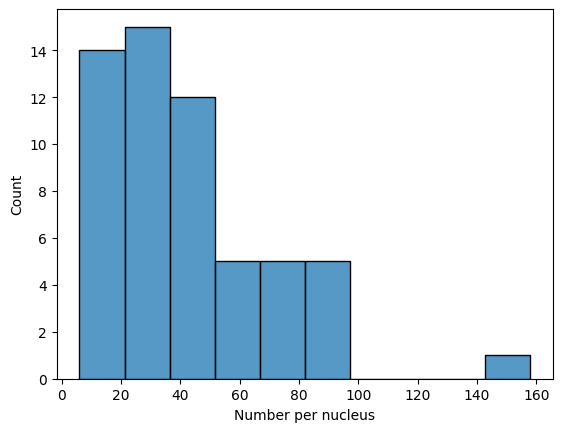

In [15]:
ax = sns.histplot(data=nuclei_pd, x=nuclei_pd['Children_Masked_H2AX_Count'])
ax.set(xlabel='Number per nucleus', ylabel='Count')

[Text(0.5, 0, 'Number per nucleus'), Text(0, 0.5, 'Nucleus area')]

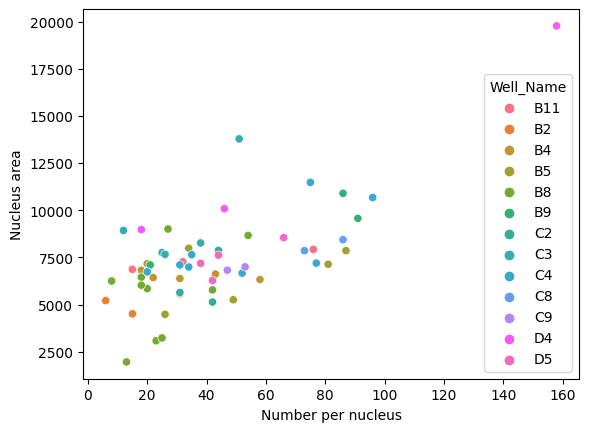

In [16]:
ax = sns.scatterplot(data=nuclei_pd, x = nuclei_pd['Children_Masked_H2AX_Count'], y = nuclei_pd['AreaShape_Area'],hue='Well_Name' )
ax.set(xlabel='Number per nucleus', ylabel='Nucleus area')